In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib


In [2]:
train_data = pd.read_csv("../data/train/bangalore_train.csv")
test_data = pd.read_csv("../data/test/bangalore_test.csv")


In [ ]:
"""
# Initialize encoder and apply it to the 'area' column
encoder = LabelEncoder()

# Fit on training data and transform both train and test data
train_data['area_encoded'] = encoder.fit_transform(train_data['area'])
test_data['area_encoded'] = encoder.transform(test_data['area'])
"""
encoder = LabelEncoder()
train_data['area_encoded'] = encoder.fit_transform(train_data['area'])
test_data['area_encoded'] = encoder.transform(test_data['area'])


In [ ]:
# Split features and target variable for both training and testing
X_train = train_data[['age', 'area_encoded', 'is_housed']]
y_train = train_data['area_points']

X_test = test_data[['age', 'area_encoded', 'is_housed']]
y_test = test_data['area_points']

In [ ]:
# Initializes the RandomForest model with 100 estimators and fit it to the training data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

# Predict the target values for the test data using the trained model
y_pred = model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


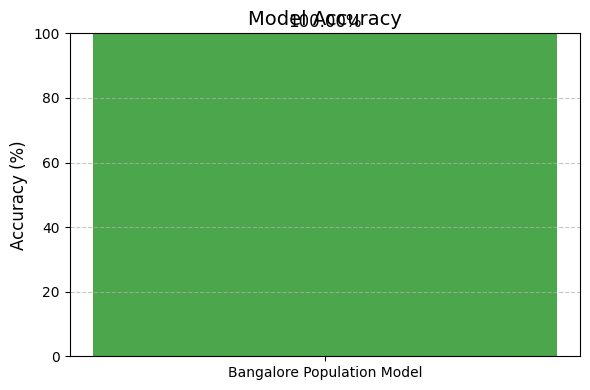

In [ ]:
model_name = "Bangalore Population Model"
accuracy = 1.0  

plt.figure(figsize=(6, 4))
plt.bar(model_name, accuracy * 100, color='green', alpha=0.7)
plt.title("Model Accuracy", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(0, 100)
plt.text(0, accuracy * 100 + 2, f"{accuracy * 100:.2f}%", ha='center', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [9]:
test_data['predicted_points'] = y_pred
print(test_data[['area', 'predicted_points']].head())

              area  predicted_points
0      Indiranagar                 3
1  Electronic City                 2
2      Indiranagar                 3
3     Basavanagudi                 1
4        Jayanagar                 2


In [ ]:
model_filename = "../model/bangalore_population_rf_model.pkl"
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to ../model/bangalore_population_rf_model.pkl
